In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.autograd import Variable
import helper

In [31]:
data_dir = 'Cat_Dog_data'

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomVerticalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])
                                       
                                      ])

test_transforms =transforms.Compose([transforms.RandomRotation(30),
                                       transforms.RandomResizedCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])
                                    ])

# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64,shuffle=True)

In [5]:
images,labels=next(iter(trainloader))
images.shape

torch.Size([64, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


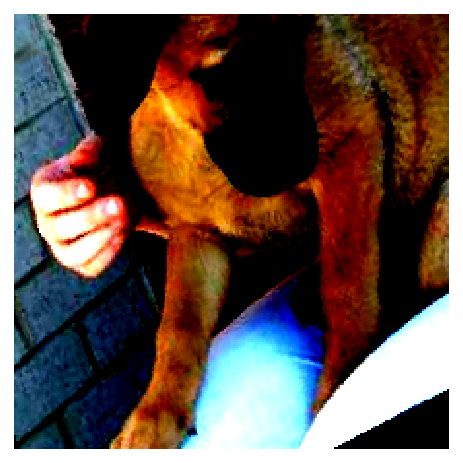

In [6]:
# Run this to test your data loader
images, labels = next(iter(trainloader))
helper.imshow(images[0], normalize=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


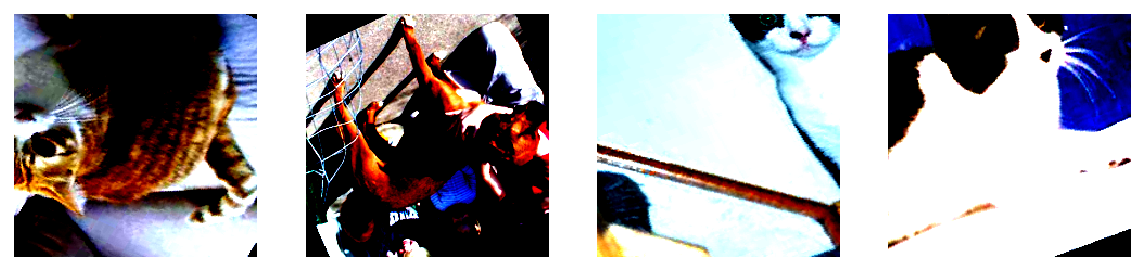

In [7]:
# change this to the trainloader or testloader 
data_iter = iter(trainloader)

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)
for ii in range(4):
    ax = axes[ii]
    helper.imshow(images[ii], ax=ax, normalize=False)

In [8]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [9]:
## TODO: Use a pretrained model to classify the cat and dog images
model=models.resnet50(pretrained=True)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [10]:
for param in model.parameters():
    param.requires_grad=False

In [11]:
classifier=nn.Sequential(nn.Linear(2048,512),
                    nn.ReLU(),
                    nn.Dropout(p=0.2),
                    nn.Linear(512,2),
                    nn.LogSoftmax(dim=1)              
)
model.fc=classifier
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
criterion=nn.NLLLoss()
optimizer=optim.Adam(model.fc.parameters(),lr=0.001)
model.to(device)



ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
epochs=1
train_loss=0
steps=0
print_every=5
train_losses=[]
test_losses=[]
for epoch in range(epochs):
    print("epoch: ",epoch)
    for images,labels in trainloader:
        steps+=1
        images=images.to(device)
        labels=labels.to(device)
        
        optimizer.zero_grad()
        
        logps=model(images)
        
        loss=criterion(logps,labels)
        
        loss.backward()
        
        optimizer.step()
        
        train_loss+=loss.item()

        print("Steps: ",steps)
    
        if steps%print_every==0:
            test_loss=0
            accuracy=0
        
            model.eval()
        
            with torch.no_grad():
                
                for inputs,labels in testloader:
                    inputs,labels=inputs.to(device),labels.to(device)
                
                    logps=model(inputs)
                
                    loss=criterion(logps,labels)
                
                    test_loss+=loss.item()
                
                #calculate the accuracy
                    ps=torch.exp(logps)
                    top_p,top_class=ps.topk(1,dim=1)
                    equals=top_class==labels.view(*top_class.shape)
                    accuracy+=torch.mean(equals.type(torch.FloatTensor)).item()
                
            print("train_loss",train_loss)
            print("test_loss",test_loss)
            train_losses.append(train_loss/print_every)
            test_losses.append(test_loss/len(testloader))
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {train_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(testloader):.3f}.. "
                  f"Test accuracy: {accuracy/len(testloader):.3f}")
            train_loss = 0
            model.train()
                
                
                


epoch:  0
Steps:  1
Steps:  2
Steps:  3
Steps:  4
Steps:  5
train_loss 2.519807070493698
test_loss 12.707812026143074
Epoch 1/1.. Train loss: 0.504.. Test loss: 0.318.. Test accuracy: 0.931
Steps:  6
Steps:  7
Steps:  8
Steps:  9
Steps:  10
train_loss 2.2951234877109528
test_loss 9.343237027525902
Epoch 1/1.. Train loss: 0.459.. Test loss: 0.234.. Test accuracy: 0.950
Steps:  11
Steps:  12
Steps:  13
Steps:  14
Steps:  15
train_loss 1.7155565321445465
test_loss 11.210412055253983
Epoch 1/1.. Train loss: 0.343.. Test loss: 0.280.. Test accuracy: 0.885
Steps:  16
Steps:  17
Steps:  18
Steps:  19
Steps:  20
train_loss 2.0189319849014282
test_loss 7.649775765836239
Epoch 1/1.. Train loss: 0.404.. Test loss: 0.191.. Test accuracy: 0.932
Steps:  21
Steps:  22
Steps:  23
Steps:  24
Steps:  25
train_loss 1.431189239025116
test_loss 10.49022514745593
Epoch 1/1.. Train loss: 0.286.. Test loss: 0.262.. Test accuracy: 0.887
Steps:  26
Steps:  27
Steps:  28
Steps:  29
Steps:  30
train_loss 1.574360

Steps:  221
Steps:  222
Steps:  223
Steps:  224
Steps:  225
train_loss 1.6752258241176605
test_loss 6.373256720602512
Epoch 1/1.. Train loss: 0.335.. Test loss: 0.159.. Test accuracy: 0.938
Steps:  226
Steps:  227
Steps:  228
Steps:  229
Steps:  230
train_loss 1.341074600815773
test_loss 6.135161776095629
Epoch 1/1.. Train loss: 0.268.. Test loss: 0.153.. Test accuracy: 0.944
Steps:  231
Steps:  232
Steps:  233
Steps:  234
Steps:  235
train_loss 1.0763505101203918
test_loss 6.368473434820771
Epoch 1/1.. Train loss: 0.215.. Test loss: 0.159.. Test accuracy: 0.930
Steps:  236
Steps:  237
Steps:  238
Steps:  239
Steps:  240
train_loss 0.8487928211688995
test_loss 5.240843463689089
Epoch 1/1.. Train loss: 0.170.. Test loss: 0.131.. Test accuracy: 0.952
Steps:  241
Steps:  242
Steps:  243
Steps:  244
Steps:  245
train_loss 1.104899913072586
test_loss 5.490873113274574
Epoch 1/1.. Train loss: 0.221.. Test loss: 0.137.. Test accuracy: 0.948
Steps:  246
Steps:  247
Steps:  248
Steps:  249
Step

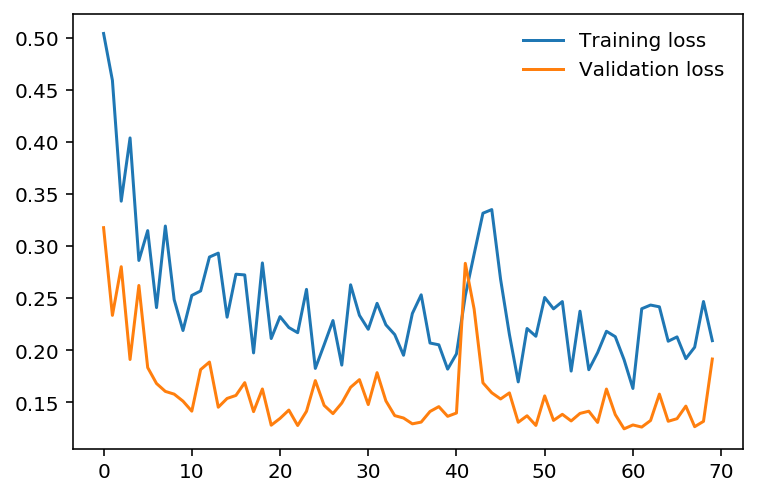

In [15]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

In [32]:
# initialize lists to monitor test loss and accuracy
import numpy as np
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
classes=['Cat','Dog']
model.eval() # prep model for *evaluation*

for data, target in testloader:
    # forward pass: compute predicted outputs by passing inputs to the model
    data,target=data.to(device),target.to(device)
    output = model(data)
    
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(len(target)):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(testloader)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(2):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 11.478301

Test Accuracy of     0: 98% (1235/1250)
Test Accuracy of     1: 85% (1073/1250)

Test Accuracy (Overall): 92% (2308/2500)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Images shape:  (64, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

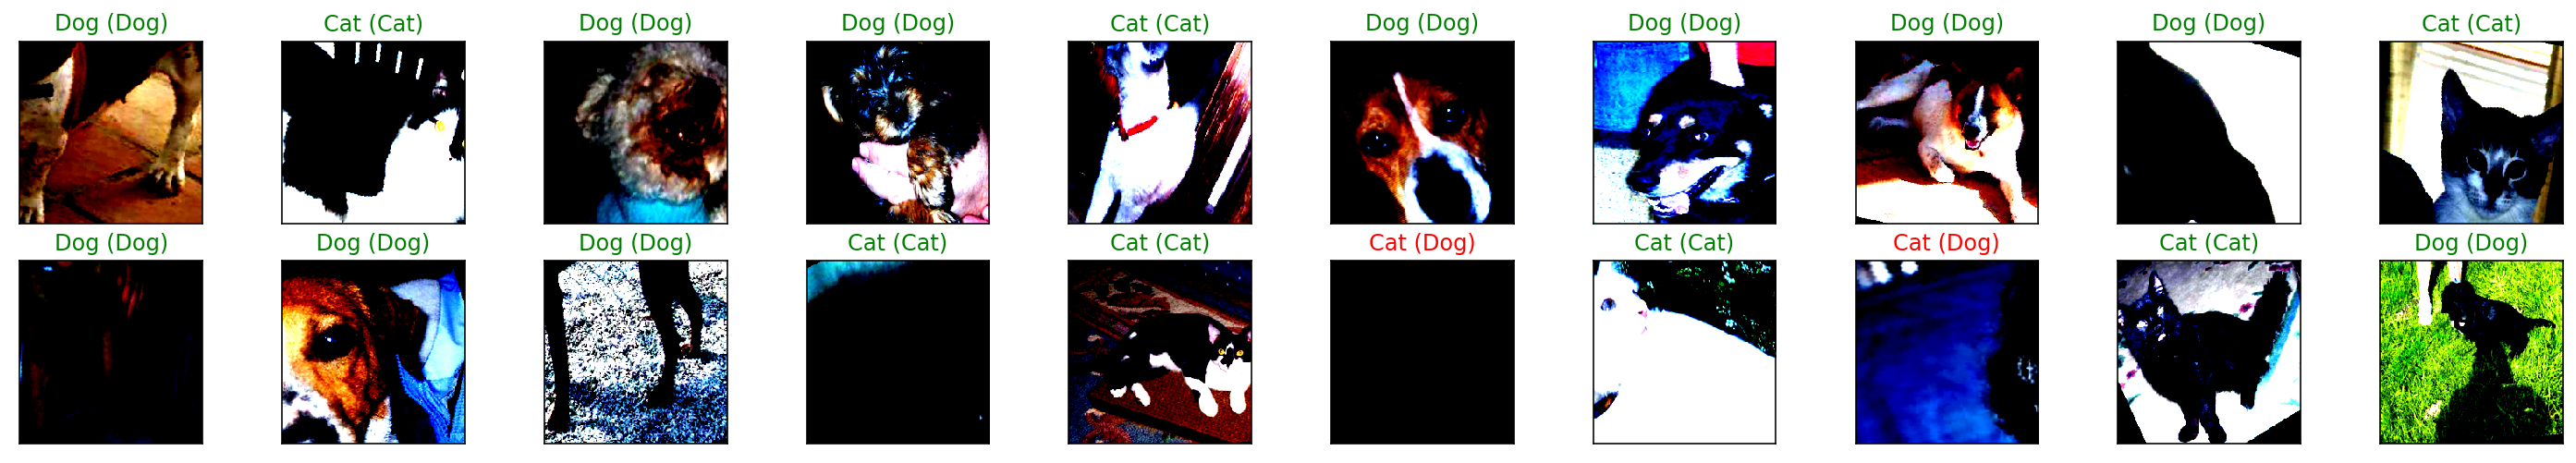

In [33]:
import random

dataiter = iter(testloader)
images, labels = dataiter.next()
images,labels=images.to(device),labels.to(device)
# get sample outputs
output = model(images)
# convert output probabilities to predicted class
output=output.cpu()
images=images.cpu()
labels=labels.cpu()
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()
images = images.swapaxes(1,2).swapaxes(2,3)
print("Images shape: ",images.shape)
# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]))
    ax.set_title("{} ({})".format(str(classes[preds[idx]]), str(classes[labels[idx]]) ),
                 color=("green" if preds[idx]==labels[idx] else "red"))